## 1-RSRP

In [1]:
import pandas as pd 
rsrp = pd.read_csv('../input/rsrp-and-trafficvolume/RSRP.csv')
rsrp.head()

,Timestamp,LocationLatitude,LocationLongitude,RadioConnectionType,Country,RadioNetworkGeneration,RadioOperatorName,RSRP,RadioMobileDataEnabled,DeviceManufacturer,DeviceName
0,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W
1,2019-11-02 00:09:29.386 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
2,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,D728W
3,2019-11-02 00:10:45.323 +0300,24.54054,46.784737,Mobile,Saudi Arabia,3G,Operator C,2147483647,Enabled,HTC,Desire 728 Dual Sim
4,2019-11-02 00:11:26.822 +0300,24.54054,46.784737,Mobile,Saudi Arabia,4G,Operator C,2147483647,Enabled,HTC,D728W


### RSRP VS Devices

In [40]:
import plotly_express as px
data_make_model = rsrp.groupby(['DeviceManufacturer', 'DeviceName']).mean().reset_index()
data_make_model.rename(columns = {0:'model_count'}, inplace=True)

data_make_model.sort_values(by = 'RSRP', ascending=False, inplace=True)
fig =px.scatter(data_make_model,
             x = 'DeviceManufacturer', y='RSRP', color = 'DeviceName',width=1100, height=700,
                title='mobile phones VS performance')
fig.show()
fig.write_html("./mobile phones VS performance.html")


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point # Shapely for converting latitude/longtitude to geometry
import geopandas as gpd # To create GeodataFrame

With only these 3 lines of code, Geometry column is created inside a Geopandas GeodataFrame.

In [5]:
#1-RSRP
# creating a geometry column 
geometry = [Point(xy) for xy in zip(rsrp['LocationLongitude'], rsrp['LocationLatitude'])]
# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}
# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(rsrp, crs=crs, geometry=geometry)

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [9]:
gdfA=gdf[gdf['RadioOperatorName']=='Operator A']
gdfB=gdf[gdf['RadioOperatorName']=='Operator B']
gdfC=gdf[gdf['RadioOperatorName']=='Operator C']

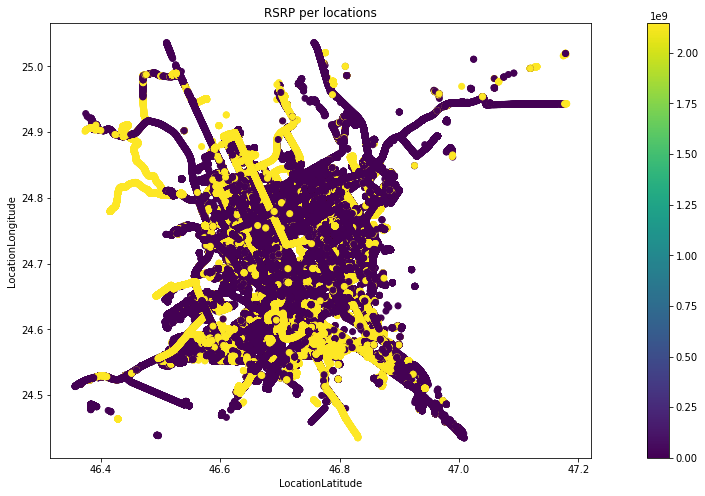

In [11]:
gdfA.plot(column = 'RSRP',figsize=(20, 8), legend = True)
plt.title('RSRP per locations')
plt.xlabel('LocationLatitude')
plt.ylabel('LocationLongitude')
plt.savefig('RSRP-A.png');

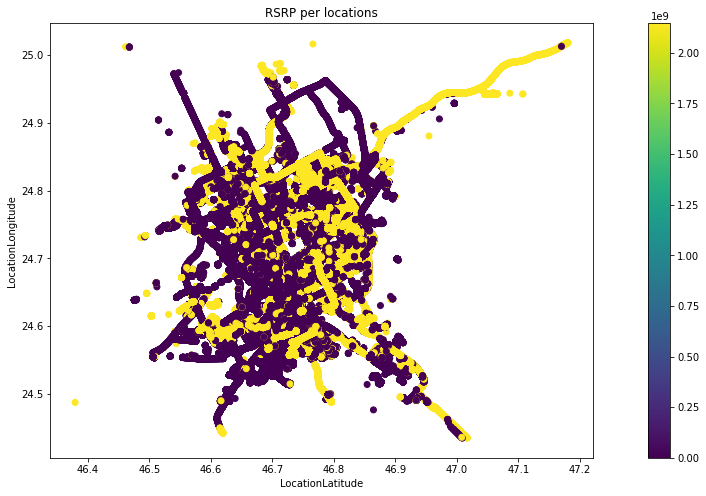

In [12]:
gdfB.plot(column = 'RSRP',figsize=(20, 8), legend = True)
plt.title('RSRP per locations')
plt.xlabel('LocationLatitude')
plt.ylabel('LocationLongitude')
plt.savefig('RSRP-B.png');

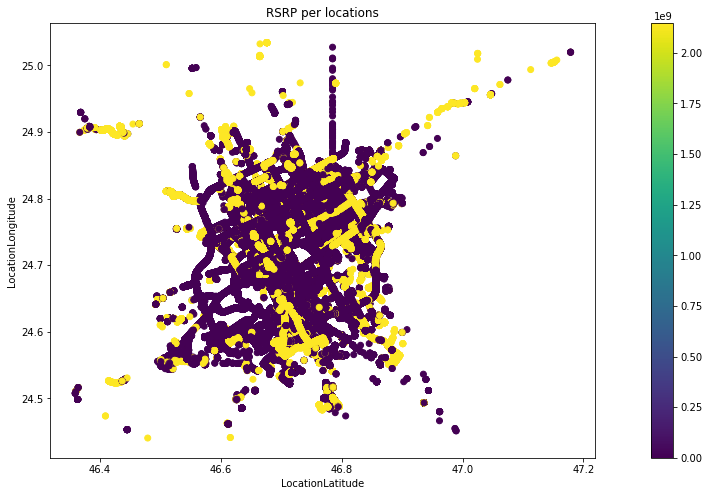

In [13]:
gdfC.plot(column = 'RSRP',figsize=(20, 8), legend = True)
plt.title('RSRP per locations')
plt.xlabel('LocationLatitude')
plt.ylabel('LocationLongitude')
plt.savefig('RSRP-C.png');